In [72]:
from skimage.color import rgb2hsv
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle as pkl
import cv2
import tensorflow as tf

In [6]:
cwd = os.getcwd()

In [7]:
target = pd.read_csv(cwd + '\\data\\count_.csv', names=['target'])

In [8]:
target.head()

,target
0,29
1,30
2,35
3,31
4,26


In [9]:
input_ = np.append(pkl.load(open(r'C:\Users\abelp\machine_learning\crowd_count\data\final_input_aj_1.pkl', 'rb')),
                  pkl.load(open(r'C:\Users\abelp\machine_learning\crowd_count\data\final_input_aj_2.pkl', 'rb')), axis=0)

In [10]:
model_location = 'C:\\Users\\abelp\\machine_learning\\crowd_count\\models\\'

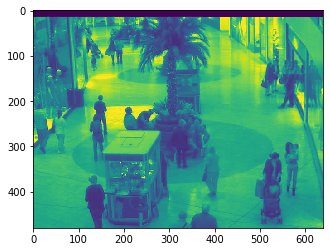

In [19]:
plt.imshow(input_[0])
plt.show()

In [11]:
input_.shape

(2000, 480, 640)

In [22]:
input_ = np.expand_dims(input_, axis=3)

In [23]:
input_.shape

(2000, 480, 640, 1)

In [24]:
datagen = ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

In [25]:
for x in range(0,100):
    datagen.fit(input_[x*20:x*20+20])
    generated_images_ = datagen.flow(input_[x*20:x*20+20], y=target[x*20:x*20+20], batch_size=20)
    input_ = np.append(input_, generated_images_[0][0].astype(np.uint8), axis=0)
    target = np.append(target, generated_images_[0][1])

In [26]:
len(input_)

4000

In [27]:
target.shape

(4000,)

In [76]:
input_.shape

(4000, 480, 640, 1)

In [77]:
input_ = tf.squeeze(input_)

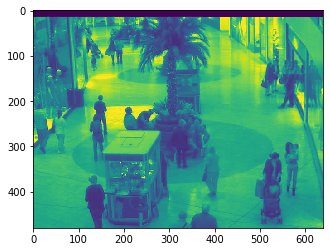

In [79]:
plt.imshow((input_[0]))
plt.show()

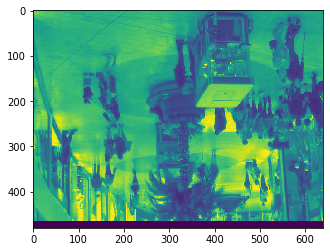

In [80]:
plt.imshow((input_[2005]))
plt.show()

In [16]:
#input_data = np.zeros(shape=(len(input_),480,640,1), dtype = int)

In [85]:
pkl.dump(input_[2000:], open(r'C:\Users\abelp\machine_learning\crowd_count\final_data\augmented_frames.pkl', 'wb'))
pkl.dump(target[2000:], open(r'C:\Users\abelp\machine_learning\crowd_count\final_data\augmented_target.pkl', 'wb'))

In [86]:
len(input_[2000:])

2000